<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/main/C%C3%B3pia_de_step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial how to use [xgboost](https://github.com/dmlc/xgboost)

In [1]:
import xgboost as xgb

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


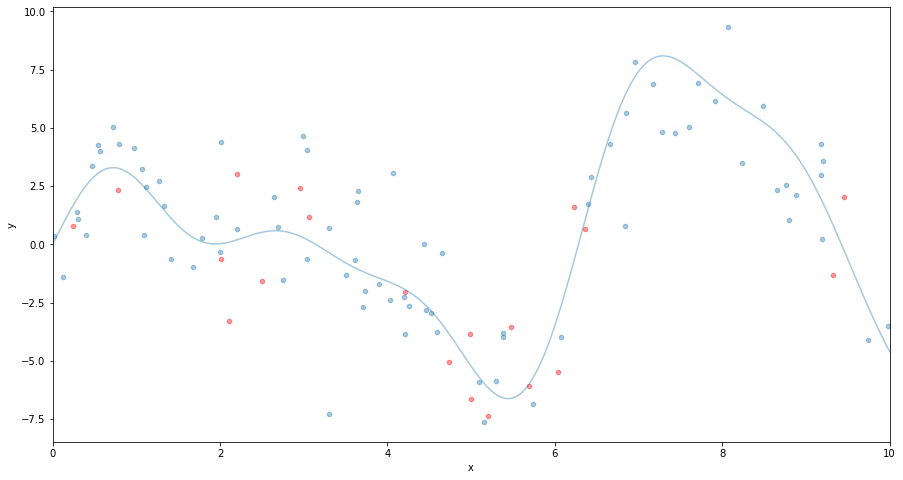

In [2]:
FIGSIZE = (15, 8)

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x*np.sin(x) + 2 * np.sin(2 * x) + np.sin(3 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(15)
    X = np.random.uniform(0, 10, size=n_samples)[:, np.newaxis]
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(100)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(alpha=0.4, s=20):
    fig = plt.figure(figsize=FIGSIZE)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha)
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    
annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}
    
plot_data()

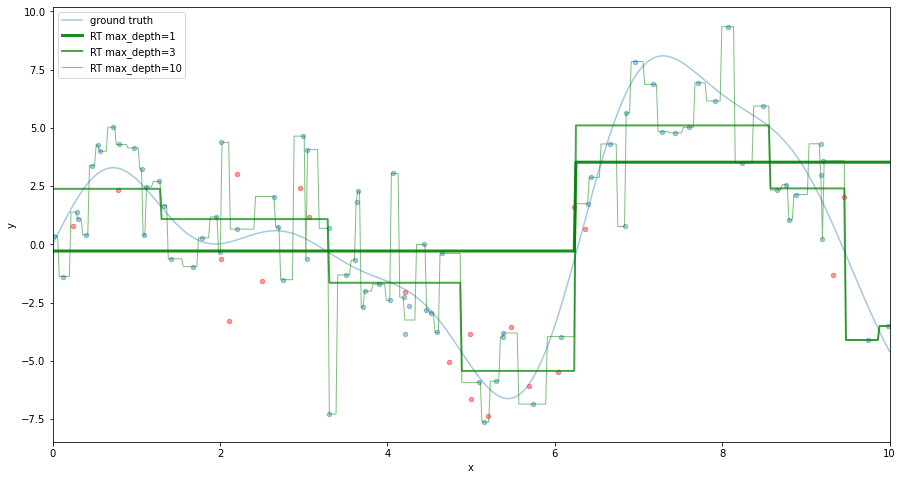

In [3]:
plot_data()

est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
x_pred_1 = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, x_pred_1, label='RT max_depth=1', color='g', alpha=0.9, linewidth=3)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=2)

est = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=10', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

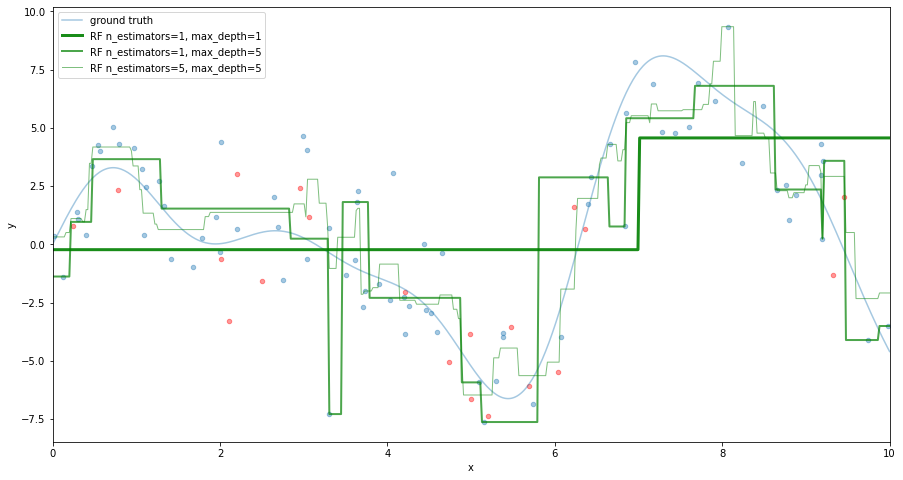

In [4]:
plot_data()

est = RandomForestRegressor(n_estimators=1, max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=1', color='g', alpha=0.9, linewidth=3)

est = RandomForestRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = RandomForestRegressor(n_estimators=5, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=5, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

[01:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


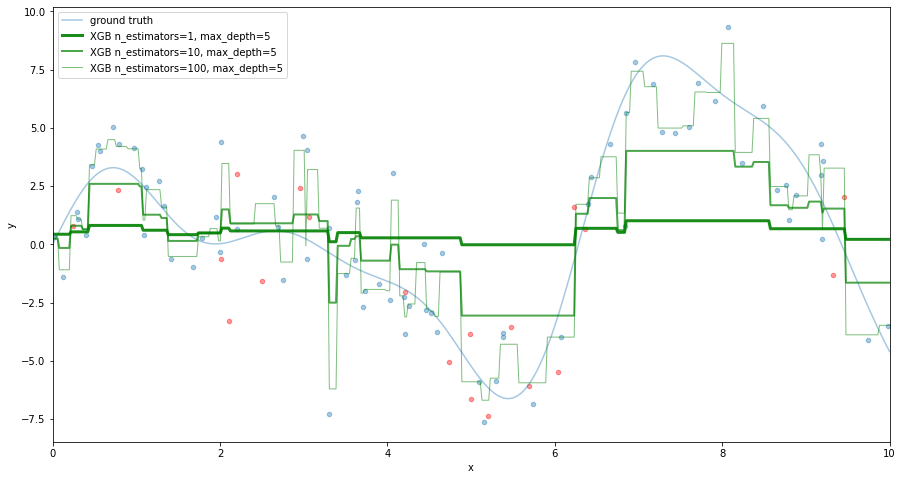

In [5]:
plot_data()

est = xgb.XGBRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=1, max_depth=5', color='g', alpha=0.9, linewidth=3)

est = xgb.XGBRegressor(n_estimators=10, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=10, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = xgb.XGBRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=100, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

Let's analyze what parameters (and default value) a model has and what that means

* base_score=0.5
* colsample_bylevel=1
* colsample_bytree=1
* gamma=0
* **learning_rate=0.1**
* max_delta_step=0
* max_depth=3
* min_child_weight=1
* missing=None
* **n_estimators=100**
* nthread=-1
* objective='reg:linear'
* reg_alpha=0
* reg_lambda=1
* scale_pos_weight=1
* seed=0
* silent=True
* subsample=1

Play aroudn with params like: learning_rate, n_estimators, max_depth, colsample_bylevel

[01:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


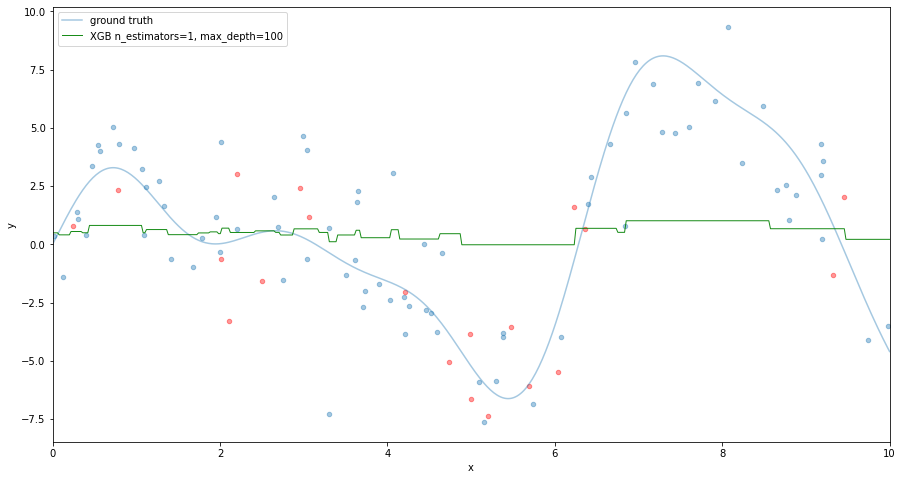

In [6]:
plot_data()

params = [ (1, 100)] #, (10, 100), (100, 100) ]
for (i, (n_estimators, max_depth)) in enumerate(params):
    
    est = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth).fit(X_train, y_train)
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators={0}, max_depth={1}'.format(n_estimators, max_depth), color='g', alpha=0.9, linewidth=len(params)-i)


plt.legend(loc='upper left')

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, IntSlider, FloatSlider

n_estimators_slider = IntSlider(min=1, max=1000, step=20, value=30)
max_depth_slider = IntSlider(min=1, max=15, step=1, value=3)
learning_rate_slider = FloatSlider(min=0.01, max=0.8, step=0.01, value=0.1)
subsample_slider = FloatSlider(min=0.1, max=1, step=0.1, value=1.0)

gamma_slider = FloatSlider(min=0.1, max=1, step=0.1, value=0)
reg_alpha_slider = FloatSlider(min=0.1, max=1, step=0.1, value=0)
reg_lambda_slider = FloatSlider(min=0.1, max=1, step=0.1, value=1.0)


@interact(n_estimators=n_estimators_slider, max_depth=max_depth_slider, learning_rate=learning_rate_slider,\
         subsample=subsample_slider, gamma=gamma_slider, reg_alpha=reg_alpha_slider, reg_lambda=reg_lambda_slider)
def plot(n_estimators, max_depth, learning_rate, subsample, gamma, reg_alpha, reg_lambda):
    est = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, \
                           subsample=subsample, gamma=gamma, reg_alpha=reg_alpha, reg_lambda=reg_lambda).fit(X_train, y_train)

    plot_data()
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), \
             label='XGB n_estimators={0}, max_depth={1}, learning_rate={2}, subsample={3}, gamma={4}, reg_alpha={5}, reg_lambda={6}'.format(n_estimators, max_depth, learning_rate, subsample, gamma, reg_alpha, reg_lambda),\
             color='g', alpha=0.9, linewidth=len(params)-i)
    
    plt.legend(loc='upper left')

interactive(children=(IntSlider(value=30, description='n_estimators', max=1000, min=1, step=20), IntSlider(val…

## Links
* http://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
* http://nbviewer.jupyter.org/github/pprett/pydata-gbrt-tutorial/blob/master/gbrt-tutorial.ipynb
* http://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
